# Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import cluster
from sklearn.datasets import make_blobs
from PIL.Image import new
from plotnine import *
from plotnine.data import *
from plotutils import *
!pip3 install scikit-learn-extra
!pip3 install plotutils
!pip3 install plotnine

# Importing Collated Dataset from HOMER Software

In [2]:
df = pd.read_csv('CSS2_Data_Collation.csv')

df = df.dropna()

X = df.copy()

del X["Name"]

In [3]:
df

,Name,Latitude,Longitude,Jan,Feb,Mar,Apr,May,Jun,Jul,...,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2
0,BOYUP BROOK,-33.83425,116.38776,0.652,0.636,0.588,0.546,0.511,0.513,0.510,...,6.93,6.55,6.74,7.35,7.32,7.23,7.24,6.80,7.05,6.98
1,DONNYBROOK,-33.57130,115.82446,0.693,0.676,0.631,0.578,0.524,0.502,0.506,...,7.12,6.60,6.82,7.49,7.51,7.33,7.31,6.91,7.22,7.26
2,COLLIE,-33.36206,116.15617,0.652,0.635,0.586,0.542,0.504,0.505,0.503,...,6.99,6.57,6.68,7.21,7.14,7.00,7.09,6.76,7.11,7.05
3,WAROONA,-32.84323,115.92201,0.707,0.692,0.653,0.606,0.555,0.538,0.540,...,7.43,6.81,6.98,7.74,7.76,7.39,7.42,7.18,7.70,7.80
4,NARROGIN,-32.93282,117.17763,0.627,0.603,0.575,0.555,0.538,0.542,0.540,...,6.98,6.56,6.53,6.96,6.78,6.65,6.85,6.72,7.09,7.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,DARLINGTON,-31.91840,116.07880,0.643,0.624,0.596,0.570,0.545,0.538,0.535,...,7.06,6.33,6.31,6.41,6.55,6.62,7.00,7.24,7.32,7.28
65,SINGLETON,-32.44440,115.75110,0.707,0.691,0.651,0.602,0.549,0.531,0.534,...,7.49,6.84,6.96,7.66,7.67,7.30,7.36,7.26,7.80,7.95
66,HALLS CREEK,-18.22485,127.66647,0.578,0.565,0.608,0.659,0.684,0.679,0.701,...,5.23,6.17,6.41,6.54,6.40,6.23,5.80,5.61,5.07,5.05
67,BUNBURY,-33.32711,115.64137,0.693,0.675,0.629,0.575,0.521,0.498,0.502,...,7.20,6.64,6.82,7.54,7.56,7.26,7.27,6.94,7.37,7.43


In [4]:
X

,Latitude,Longitude,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,...,Mar.2,Apr.2,May.2,Jun.2,Jul.2,Aug.2,Sep.2,Oct.2,Nov.2,Dec.2
0,-33.83425,116.38776,0.652,0.636,0.588,0.546,0.511,0.513,0.510,0.511,...,6.93,6.55,6.74,7.35,7.32,7.23,7.24,6.80,7.05,6.98
1,-33.57130,115.82446,0.693,0.676,0.631,0.578,0.524,0.502,0.506,0.532,...,7.12,6.60,6.82,7.49,7.51,7.33,7.31,6.91,7.22,7.26
2,-33.36206,116.15617,0.652,0.635,0.586,0.542,0.504,0.505,0.503,0.506,...,6.99,6.57,6.68,7.21,7.14,7.00,7.09,6.76,7.11,7.05
3,-32.84323,115.92201,0.707,0.692,0.653,0.606,0.555,0.538,0.540,0.565,...,7.43,6.81,6.98,7.74,7.76,7.39,7.42,7.18,7.70,7.80
4,-32.93282,117.17763,0.627,0.603,0.575,0.555,0.538,0.542,0.540,0.540,...,6.98,6.56,6.53,6.96,6.78,6.65,6.85,6.72,7.09,7.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-31.91840,116.07880,0.643,0.624,0.596,0.570,0.545,0.538,0.535,0.542,...,7.06,6.33,6.31,6.41,6.55,6.62,7.00,7.24,7.32,7.28
65,-32.44440,115.75110,0.707,0.691,0.651,0.602,0.549,0.531,0.534,0.560,...,7.49,6.84,6.96,7.66,7.67,7.30,7.36,7.26,7.80,7.95
66,-18.22485,127.66647,0.578,0.565,0.608,0.659,0.684,0.679,0.701,0.697,...,5.23,6.17,6.41,6.54,6.40,6.23,5.80,5.61,5.07,5.05
67,-33.32711,115.64137,0.693,0.675,0.629,0.575,0.521,0.498,0.502,0.529,...,7.20,6.64,6.82,7.54,7.56,7.26,7.27,6.94,7.37,7.43


# K-Means

In [5]:
K = range(1,15)
Sum_of_squared_distances = []
Silhouette_score = []
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=0, max_iter=500, verbose=2).fit(X)
  Sum_of_squared_distances.append(kmeans.inertia_)
  Silhouette_score.append(silhouette_score(X, kmeans.labels_, metric = 'euclidean') if k != 1 else None)

Initialization complete


Iteration 0, inertia 4651.059378203399.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3305.6980377902.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3429.806559215499.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4017.2433685879.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4017.2433685879.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4093.6172971271985.
Iteration 1, inertia 3009.8263862900253.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3294.3390528679993.
Iteration 1, inertia 3009.8263862900253.
Converged at ite

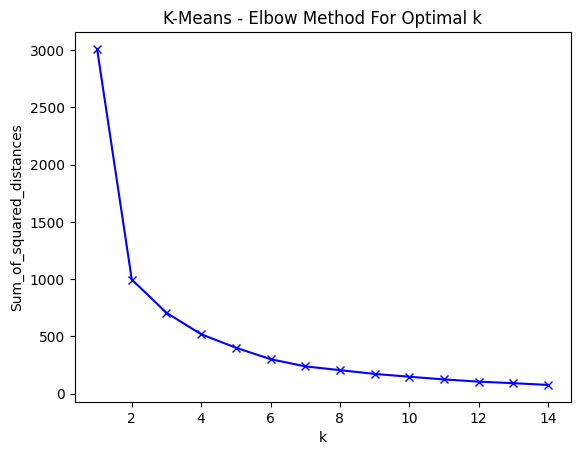

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('K-Means - Elbow Method For Optimal k')
plt.show()

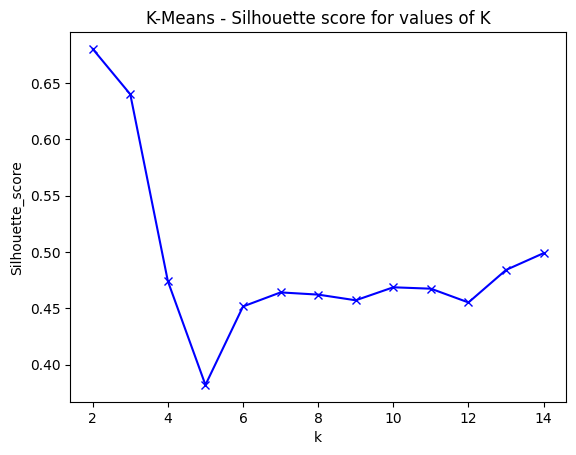

In [7]:
plt.plot(K, Silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('K-Means - Silhouette score for values of K')
plt.show()

In [8]:
N = 7

In [9]:
kmeans = KMeans(n_clusters=N, random_state=0, max_iter=500, verbose=2).fit(X)

Initialization complete
Iteration 0, inertia 370.86786447329985.
Iteration 1, inertia 242.80111957761193.
Iteration 2, inertia 238.02587102260986.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 388.1026491144999.
Iteration 1, inertia 274.37221454347167.
Iteration 2, inertia 267.4113879556321.
Iteration 3, inertia 266.3009808551192.
Iteration 4, inertia 265.6529186170603.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 395.406808031.
Iteration 1, inertia 283.4016007771194.
Iteration 2, inertia 281.921013941693.
Iteration 3, inertia 280.66919078395665.
Iteration 4, inertia 279.94124558928627.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 376.6596555260001.
Iteration 1, inertia 272.9571210192156.
Iteration 2, inertia 265.6529186170603.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 376.0012067974999.
Iteration 1, in

In [10]:
kmeans.labels_

array([6, 0, 3, 0, 3, 1, 2, 3, 4, 6, 0, 4, 0, 3, 4, 6, 0, 3, 3, 1, 3, 3,
       4, 1, 3, 0, 0, 0, 6, 6, 5, 2, 6, 6, 0, 1, 1, 1, 3, 2, 5, 6, 1, 0,
       0, 4, 6, 3, 6, 0, 0, 3, 6, 0, 0, 4, 0, 0, 1, 0, 6, 0, 6, 3, 3, 0,
       2, 0, 3])

In [11]:
kmeans.cluster_centers_

array([[-33.03464714, 115.56349762,   0.69761905,   0.67809524,
          0.63166667,   0.57885714,   0.52542857,   0.50504762,
          0.50980952,   0.53709524,   0.5687619 ,   0.60933333,
          0.64919048,   0.68047619,   8.3252381 ,   7.40761905,
          5.84047619,   4.18571429,   2.92904762,   2.4252381 ,
          2.61904762,   3.49095238,   4.79380952,   6.28095238,
          7.55333333,   8.29428571,   7.97714286,   7.85619048,
          7.41      ,   6.78714286,   7.01333333,   7.79190476,
          7.8252381 ,   7.52904762,   7.50333333,   7.19428571,
          7.59285714,   7.71190476],
       [-22.10418125, 117.8515975 ,   0.662125  ,   0.628375  ,
          0.64675   ,   0.645     ,   0.64075   ,   0.638875  ,
          0.6825    ,   0.714     ,   0.727625  ,   0.727     ,
          0.712625  ,   0.68675   ,   7.7425    ,   6.98625   ,
          6.4675    ,   5.46625   ,   4.545     ,   4.095     ,
          4.57125   ,   5.60375   ,   6.81      ,   7.77      ,
   

In [12]:
kmeans.inertia_

238.02587102260986

In [13]:
kmeans.n_iter_

3

In [14]:
kmeans.n_features_in_

38

# K-Medoids

In [15]:
K = range(1,15)
Sum_of_squared_distances = []
Silhouette_score = []
for k in K:
  kmedoids = KMedoids(n_clusters=k, random_state=0).fit(X)
  Sum_of_squared_distances.append(kmedoids.inertia_)
  Silhouette_score.append(silhouette_score(X, kmedoids.labels_, metric = 'euclidean') if k != 1 else None)

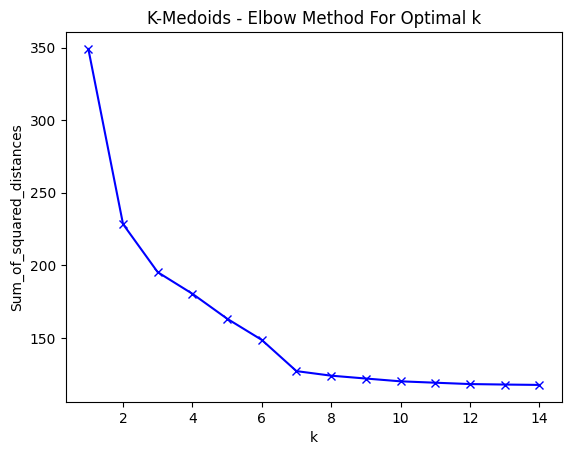

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('K-Medoids - Elbow Method For Optimal k')
plt.show()

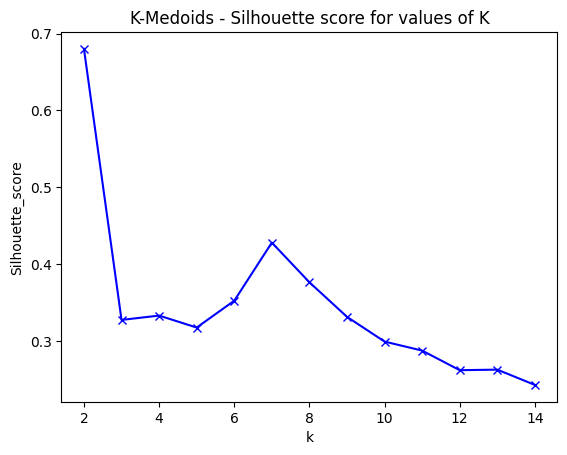

In [17]:
plt.plot(K, Silhouette_score, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette_score')
plt.title('K-Medoids - Silhouette score for values of K')
plt.show()

In [18]:
N = 7

In [19]:
kmedoids = KMedoids(n_clusters=N, random_state=0).fit(X)

In [20]:
kmedoids.labels_

array([3, 2, 3, 2, 3, 1, 1, 0, 6, 3, 2, 6, 2, 0, 6, 3, 5, 0, 6, 1, 0, 0,
       6, 1, 0, 5, 5, 2, 3, 3, 4, 1, 3, 3, 2, 1, 1, 1, 0, 1, 4, 3, 1, 2,
       5, 6, 3, 0, 5, 5, 5, 0, 3, 2, 2, 6, 2, 5, 1, 2, 4, 2, 3, 0, 0, 2,
       1, 2, 0], dtype=int64)

In [21]:
kmedoids.inertia_

127.07265591299553

In [22]:
kmedoids.cluster_centers_

array([[-31.54977, 116.46743,   0.643  ,   0.623  ,   0.594  ,   0.566  ,
          0.539  ,   0.532  ,   0.529  ,   0.538  ,   0.554  ,   0.595  ,
          0.615  ,   0.64   ,   7.69   ,   6.84   ,   5.54   ,   4.16   ,
          3.08   ,   2.63   ,   2.79   ,   3.56   ,   4.72   ,   6.17   ,
          7.17   ,   7.81   ,   7.31   ,   7.32   ,   6.98   ,   6.56   ,
          6.58   ,   6.91   ,   6.8    ,   6.59   ,   6.78   ,   6.75   ,
          7.14   ,   7.13   ],
       [-20.31215, 118.61059,   0.625  ,   0.598  ,   0.628  ,   0.633  ,
          0.624  ,   0.619  ,   0.657  ,   0.686  ,   0.692  ,   0.696  ,
          0.682  ,   0.645  ,   7.26   ,   6.65   ,   6.34   ,   5.48   ,
          4.58   ,   4.13   ,   4.57   ,   5.53   ,   6.57   ,   7.46   ,
          7.8    ,   7.55   ,   5.88   ,   5.85   ,   5.45   ,   5.19   ,
          5.94   ,   6.53   ,   6.22   ,   5.91   ,   5.95   ,   6.16   ,
          6.32   ,   6.25   ],
       [-32.5269 , 115.7217 ,   0.707  ,   0.691  

# Dunn Indices

In [23]:
# df = pd.read_csv('CSS2_Data_Collation.csv')

# df = df.dropna()

# X = df.copy()

# del X["Name"]

In [24]:
# https://ruivieira.dev/dunn-index.html
dataset = X

def δ(ck, cl):
    values = np.ones([len(ck), len(cl)])
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
    return np.min(values)

def Δ(ci):
    values = np.zeros([len(ci), len(ci)])
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
    return np.max(values)

def dunn(k_list):
    δs = np.ones([len(k_list), len(k_list)])
    Δs = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            δs[k, l] = δ(k_list[k], k_list[l])
            Δs[k] = Δ(k_list[k])
            di = np.min(δs)/np.max(Δs)
    return di

def split_clusters(X, labels):
  k_list = []
  for i in range(len(labels)):
    location = [X.iloc[i][0], X.iloc[i][1], labels[i]]
    k_list.append(location)
  map = dict.fromkeys([i[2] for i in k_list])
  map = {k: [] for k, v in map.items()}
  for item in k_list:
    map[item[2]].append(item)
  return [np.array(l) for l in map.values()]


In [25]:
dunn(split_clusters(dataset, kmeans.labels_))

0.14582298312934355

In [26]:
dunn(split_clusters(dataset, kmedoids.labels_))

0.07145529479283215

# Visualisations

## Bar Graphs

In [27]:
Y_df = pd.DataFrame({
  'Months': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
  'Clearness Index': [0.627, 0.602, 0.571, 0.548, 0.528, 0.529, 
                      0.528, 0.532, 0.542, 0.584, 0.594, 0.620],
  'Daily Radiation (kWh/m^2/day)': [7.510, 6.590, 5.290, 3.980, 2.960, 2.560,
                      2.730, 3.470, 4.580, 6.030, 6.930, 7.580],
  'Average Wind Speed (m/s)': [6.870, 6.020, 5.840, 5.480, 4.630, 4.230, 
                               3.940, 3.950, 4.330, 5.030, 5.840, 6.310]
})

### Side-by-side bar graph indicates monthly average wind speed (m/s) and average solar irradiation (kWh/m^2/day). The line graph indicates the clearness index, with corresponding intervals noted on the right y-axis.

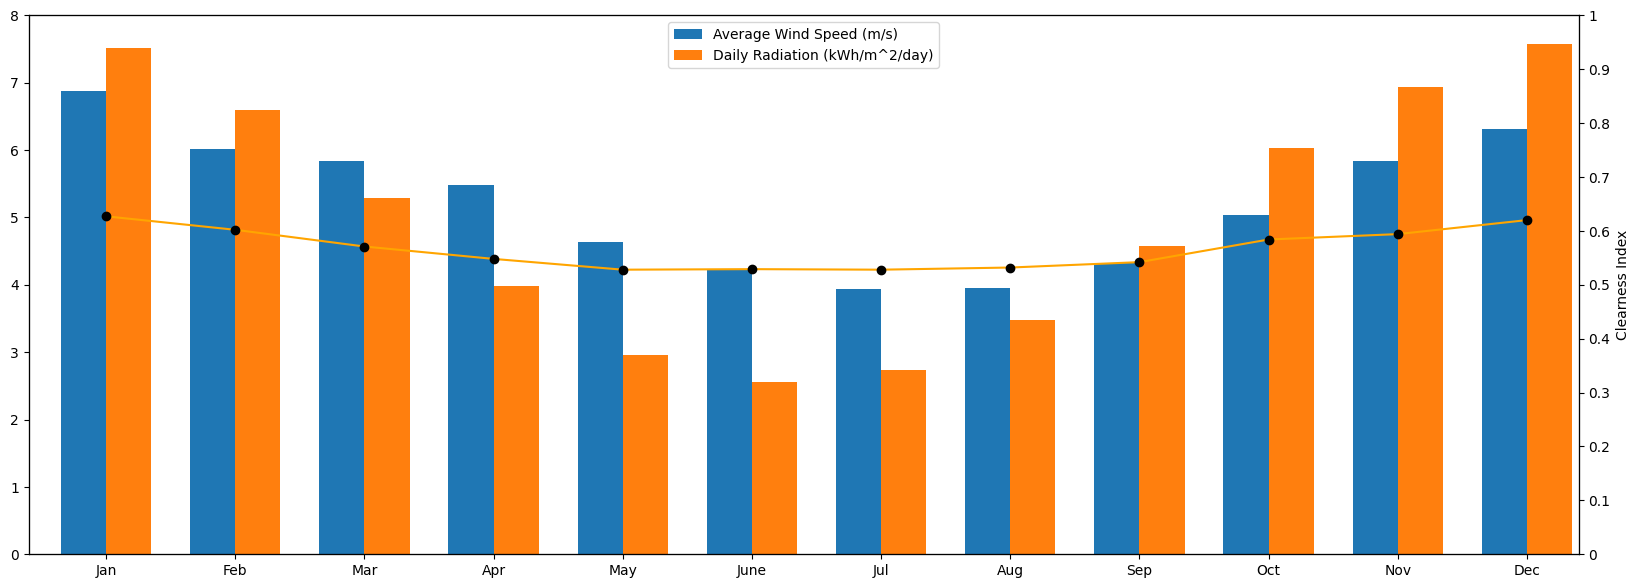

In [28]:
Y_df[["Average Wind Speed (m/s)","Daily Radiation (kWh/m^2/day)"]].plot(ylabel="", kind="bar", figsize=(20,7),width = 0.7,yticks=[0,1,2,3,4,5,6,7,8])
Y_df["Clearness Index"].plot(secondary_y=True, color="#ffa500", marker="o", mec="black", mfc="black", label="Clearness Index")
ax1 = plt.gca()
# ax1.set_xticklabels(('Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
ax1.set_xticklabels(Y_df["Months"])
ax1.set_yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
ax1.set_yticks(())
ax2 = ax1.twinx()
ax2.set_ylabel('Clearness Index')
ax2.set_yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
ax2.set_yticklabels((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
ax2.set_yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
plt.xlim([-0.6, len(Y_df['Months'])-0.6])
plt.show()

### K-Means clustering results of produced energy by wind and solar.

In [29]:
K_means_df = pd.DataFrame({
    'Cluster Centroid Colour': ['Orange', 'Lime', 'Green', 'Light Blue',
                                'Dark Blue', 'Purple', 'Magenta', 'Average'],
    'Solar Panel': [8532266, 13139750,14550168,9097885,8679237,11749650,7746013,10499281.29],
    'Wind Turbine': [7501458,4429312,219923,8331388,10689485,9794240,7783107,6964130.429]
})

<Axes: title={'center': 'K Means Clustering Results'}, xlabel='Cluster Centroid', ylabel='Energy Production (kWh/yr)'>

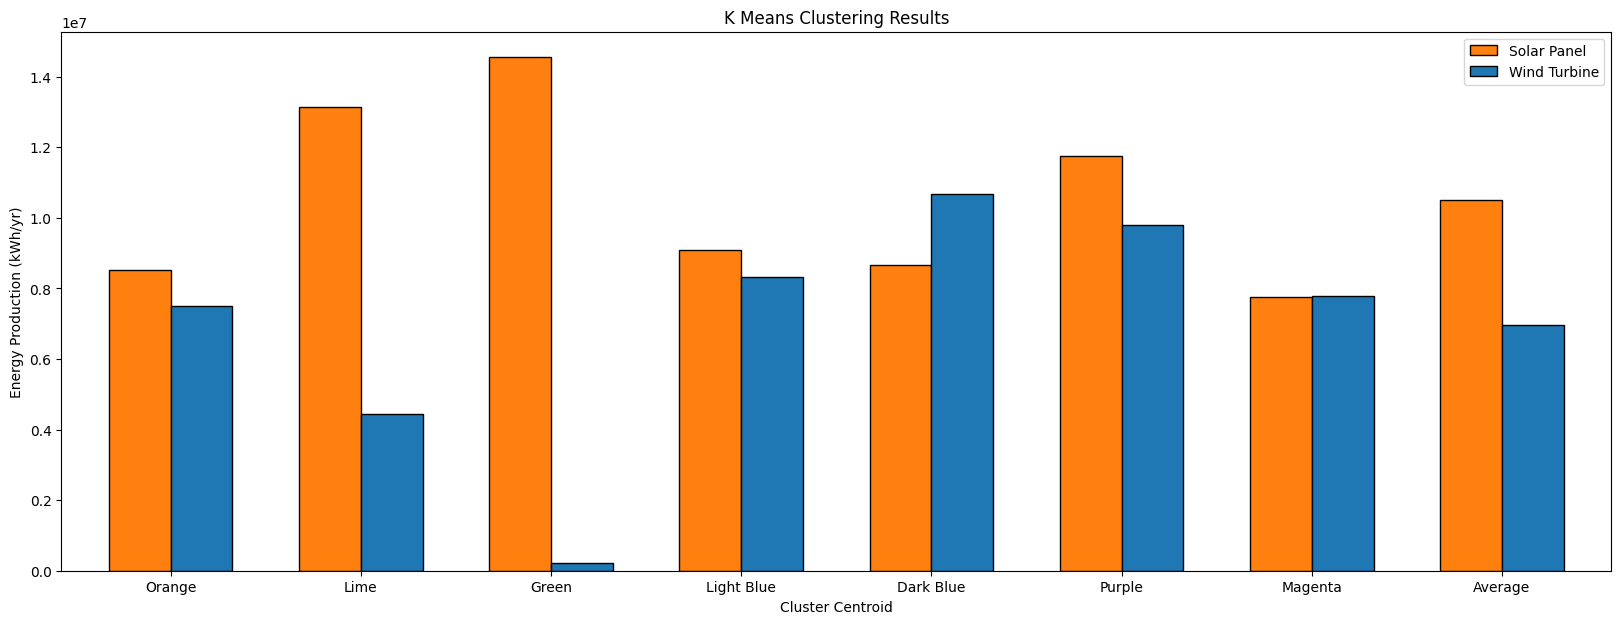

In [30]:
K_means_df.plot.bar(title="K Means Clustering Results", x="Cluster Centroid Colour", xlabel="Cluster Centroid", y=["Solar Panel","Wind Turbine"], ylabel="Energy Production (kWh/yr)",
             figsize=(20,7), rot=0, width=0.65,color=["#ff7f0f","#1f77b4"], edgecolor="black")


### K-Medoids clustering results of produced energy by wind and solar.

In [31]:
K_medoids_df = pd.DataFrame({
    'Cluster Centroid Colour': ['Orange', 'Lime', 'Green', 'Light Blue',
                                'Dark Blue', 'Purple', 'Magenta', 'Average'],
    'Solar Panel': [11507029,13810574,12605306,9132862,9043007,9918632,12481669,11214154.14],
    'Wind Turbine': [9271355,4021981,9043504,7688550,7470298,7244718,9912637,7807577.571]
})

<Axes: title={'center': 'K Medoids Clustering Results'}, xlabel='Cluster Centroid', ylabel='Energy Production (kWh/yr)'>

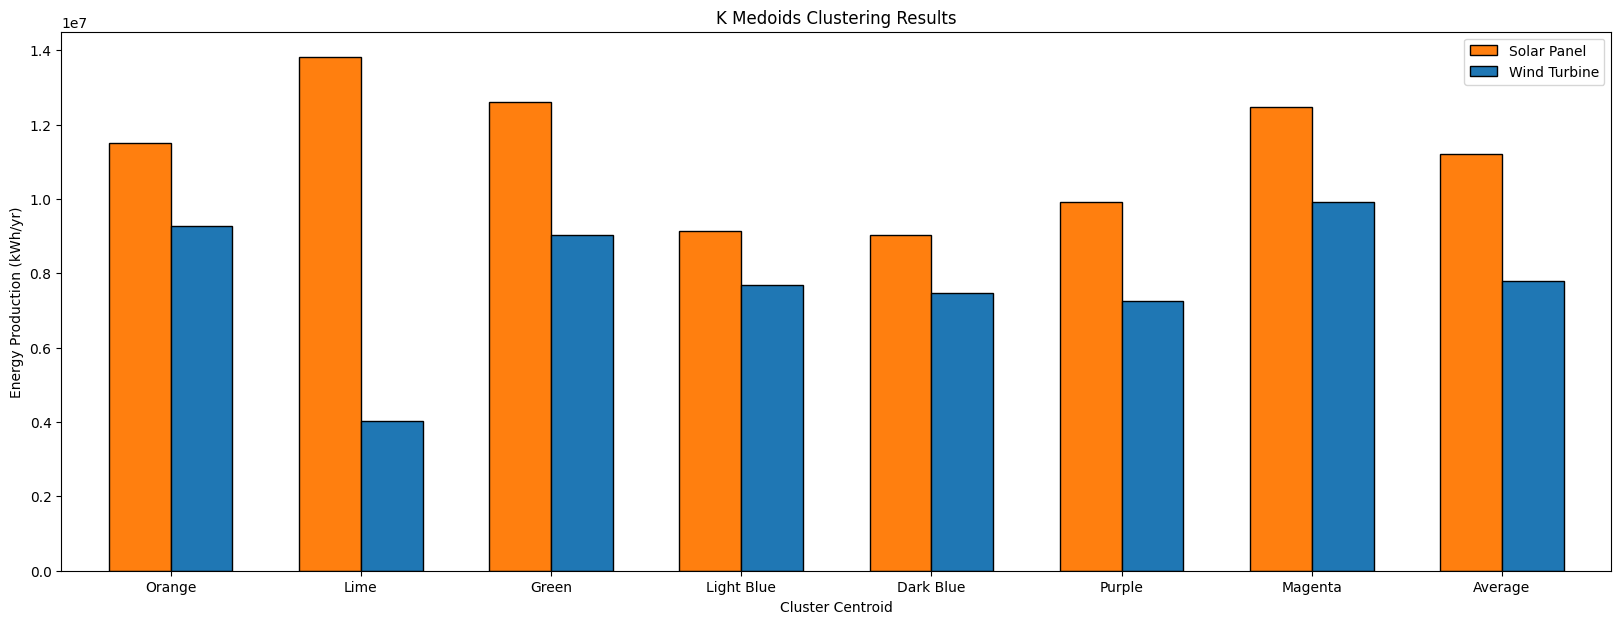

In [32]:
K_medoids_df.plot.bar(title="K Medoids Clustering Results", x="Cluster Centroid Colour", xlabel="Cluster Centroid", y=["Solar Panel","Wind Turbine"], ylabel="Energy Production (kWh/yr)",
             figsize=(20,7), rot=0, width=0.65,color=["#ff7f0f","#1f77b4"], edgecolor="black")

## Cluster Maps

In [33]:
locations = pd.read_csv('Chosen_Locations.csv')
australia_map = plt.imread('map.png')
BBox = (df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max())

### K-Means and K-Medoids Cluster Maps

In [34]:
def generateColorsSingleMap(N, colormap='hsv'): # Change color map here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
  cmap = plt.colormaps.get_cmap(colormap)
  colors = []
  for i in range(N):
      colors.append(cmap((1/N)*(i+0.5)))
  return colors

def generateClusterMap(X, N, labels, centroids):
    colors = generateColorsSingleMap(N, colormap='hsv')
    symbols = ['o', 's', 'D', 'p', 'P', 'X', '*']  # List of symbols corresponding to each cluster label
    random.shuffle(symbols)
    fig, ax = plt.subplots(figsize=(8, 7))
    ax.set_title('Rural Locations in Western Australia')
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.imshow(australia_map, zorder=0, extent=BBox, aspect='equal')

    centroid_labels = []

    for i in range(len(labels)):
        location = X.iloc[i]
        symbol_index = labels[i] % len(symbols)  # Get symbol index based on cluster label
        plt.scatter(location.Longitude, location.Latitude, c=[colors[labels[i]]], zorder=1, s=40, linewidths=0.5, edgecolors='black', marker=symbols[symbol_index])

    for i in range(len(centroids)):
        centroid = centroids[i]
        symbol_index = i % len(symbols)  # Get symbol index based on centroid index
        plt.scatter(centroid[1], centroid[0], c=[colors[i]], zorder=2, s=100, linewidths=1, edgecolors='black',
                    marker=symbols[symbol_index], label=f'Cluster {i+1}')
        centroid_labels.append(i)  
      
    plt.legend(loc='best')

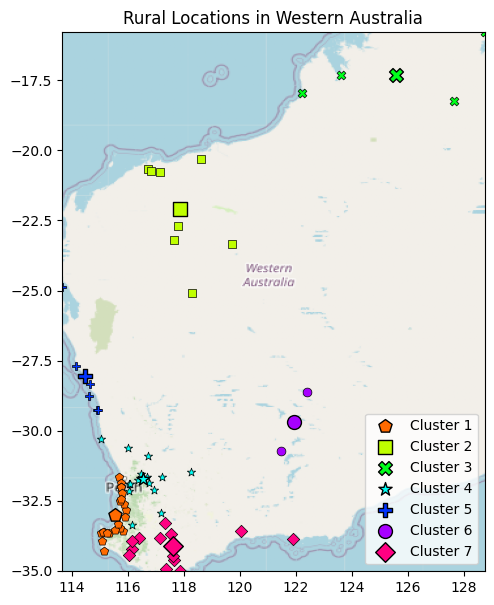

In [35]:
generateClusterMap(X, N, kmeans.labels_, kmeans.cluster_centers_)

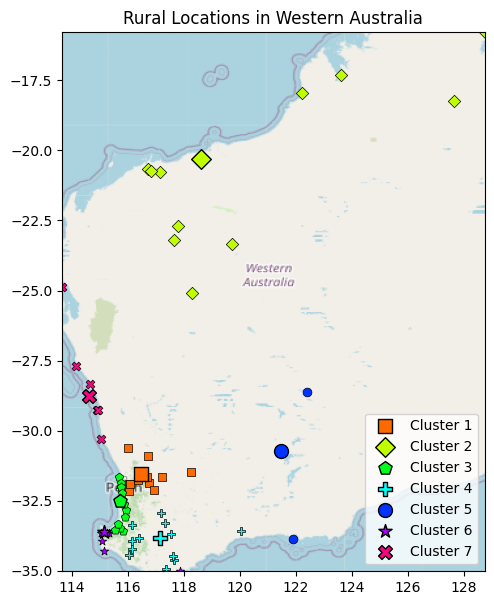

In [65]:
generateClusterMap(X, N, kmedoids.labels_, kmedoids.cluster_centers_)

### Merged Cluster Map

In [37]:
def generateColorsMergedMap(N, c=0, colormap='turbo'): # Change color map here: https://matplotlib.org/stable/tutorials/colors/colormaps.html
  # cmap = matplotlib.cm.get_cmap(colormap) 
  cmap = plt.colormaps.get_cmap(colormap)
  colors = []
  for i in range(N):
      colors.append(cmap((1/N)*(c+i)))
  return colors

def generateLayeredClusterMap(X, N, labels1, centroids1, labels2, centroids2):
    colors1 = generateColorsMergedMap(N, 1.75, colormap='turbo')
    colors2 = generateColorsMergedMap(N, -1.75, colormap='turbo')
    # colors1 = generateColors(N)
    # colors2 = generateColors(N)
    fig, ax = plt.subplots(figsize=(8, 7))
    ax.set_title('Merged KMeans and KMedoids Clusters Map')
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.imshow(australia_map, zorder=0, extent=BBox, aspect='equal')

    for i in range(len(labels1)):
        location = X.iloc[i]
        plt.scatter(location.Longitude, location.Latitude, c=[colors1[labels1[i]]], zorder=1, s=60, edgecolors='black',
                    marker="o")

    for i in range(len(labels2)):
        location = X.iloc[i]
        plt.scatter(location.Longitude, location.Latitude, c=[colors2[labels2[i]]], zorder=1, s=20, marker="x")

    for i in range(len(centroids1)):
        centroid = centroids1[i]
        plt.scatter(centroid[1], centroid[0], c=[colors1[i]], zorder=2, s=120, edgecolors='black', marker="o")

    for i in range(len(centroids2)):
        centroid = centroids2[i]
        plt.scatter(centroid[1], centroid[0], c=[colors2[i]], zorder=2, s=100, marker="x")

    handles = [plt.Line2D([], [], marker="o", color='black', linestyle='None', markersize=10),
               plt.Line2D([], [], marker="x", color='black', linestyle='None', markersize=10)]
    legend_labels = ['k-means', 'k-medoids']
    plt.legend(handles, legend_labels, loc='best')

    plt.show()

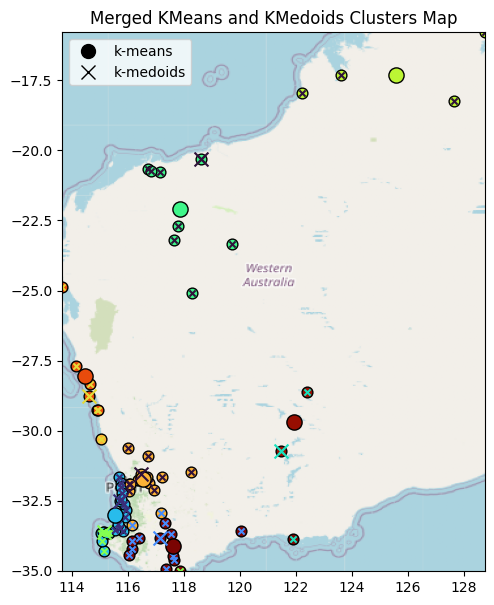

In [38]:
generateLayeredClusterMap(X, N, kmeans.labels_, kmeans.cluster_centers_, kmedoids.labels_, kmedoids.cluster_centers_)

### Artificial Cluster Maps

In [39]:
def generate_fake_cluster_map(X, labels):
    symbols = ['s', '^']
    colors = ['#0000FF', '#FFA500']
    fig, ax = plt.subplots(figsize=(8, 7))
    ax.set_title('Rural Locations in Western Australia')
    ax.set_xlim(BBox[0], BBox[1])
    ax.set_ylim(BBox[2], BBox[3])
    ax.imshow(australia_map, zorder=0, extent=BBox, aspect='equal')

    cluster_labels = []

    for i in range(len(labels)):
        location = X.iloc[i]
        symbol_index = labels[i] % len(symbols)
        color_index = labels[i] % len(colors)
        plt.scatter(location.Longitude, location.Latitude, c=colors[color_index], linewidths=0.75, zorder=5, s=40,
                    edgecolors='black', marker=symbols[symbol_index], label=f'Cluster {labels[i]}', alpha=0.8)
        cluster_labels.append(labels[i])
    
    unique_labels = list(set(cluster_labels))
    handles = [plt.Line2D([], [], marker=symbols[unique_labels[i] % len(symbols)], color=colors[unique_labels[i] % len(colors)],
                         linestyle='None', markersize=10, markeredgecolor='black') for i in range(len(unique_labels))]
    legend_labels = [f'Cluster {unique_labels[i]+1}' for i in range(len(unique_labels))]
    plt.legend(handles, legend_labels, loc='upper left')

    plt.show()

#### Bad Cluster

In [40]:
cluster_fake_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
bad_cluster = [{"Latitude": -18.19008, "Longitude": 125.54025, "Cluster_no": 0},
               {"Latitude": -16.25769, "Longitude": 126.97998, "Cluster_no": 0},
               {"Latitude": -22.28401, "Longitude": 124.29932, "Cluster_no": 0},             
               {"Latitude": -19.38111, "Longitude": 127.76001, "Cluster_no": 0},
               {"Latitude": -19.07769, "Longitude": 122.14600, "Cluster_no": 0},
               {"Latitude": -16.53090, "Longitude": 123.96973, "Cluster_no": 0},
               {"Latitude": -20.74327, "Longitude": 126.11206, "Cluster_no": 0},
               {"Latitude": -17.29558, "Longitude": 126.57300, "Cluster_no": 0},
               {"Latitude": -22.01181, "Longitude": 126.59497, "Cluster_no": 0},
               {"Latitude": -19.87781, "Longitude": 124.00269, "Cluster_no": 0},
               {"Latitude": -30.19024, "Longitude": 119.26758, "Cluster_no": 1},
               {"Latitude": -30.08335, "Longitude": 122.67334, "Cluster_no": 1},
               {"Latitude": -28.47352, "Longitude": 117.13623, "Cluster_no": 1},
               {"Latitude": -30.04532, "Longitude": 117.09229, "Cluster_no": 1},
               {"Latitude": -31.77955, "Longitude": 119.28955, "Cluster_no": 1},
               {"Latitude": -28.85189, "Longitude": 120.50903, "Cluster_no": 1},
               {"Latitude": -31.21045, "Longitude": 117.56470, "Cluster_no": 1},
               {"Latitude": -27.55455, "Longitude": 119.21265, "Cluster_no": 1},
               {"Latitude": -30.85213, "Longitude": 121.45660, "Cluster_no": 1},
               {"Latitude": -29.80609, "Longitude": 120.98694, "Cluster_no": 1}]

bad_cluster_df = pd.DataFrame(bad_cluster)

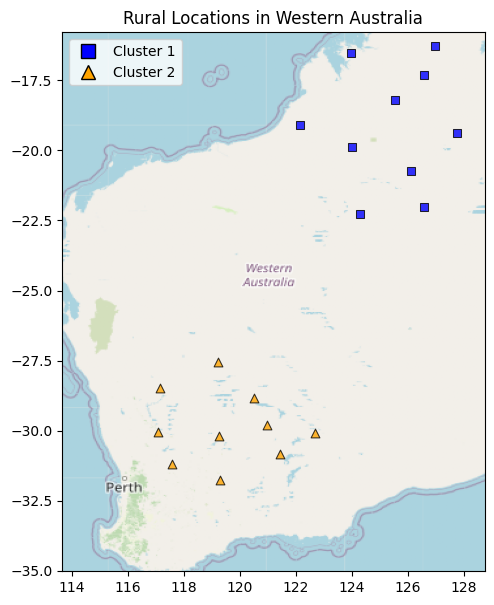

In [41]:
generate_fake_cluster_map(bad_cluster_df, cluster_fake_labels)

In [42]:
dunn(split_clusters(bad_cluster_df, cluster_fake_labels))

0.15161530294065725

#### Okay Cluster

In [43]:
okay_cluster = [{"Latitude": -18.19008, "Longitude": 125.54025, "Cluster_no": 0},
                {"Latitude": -19.04524, "Longitude": 124.89258, "Cluster_no": 0},
                {"Latitude": -19.44976, "Longitude": 126.69434, "Cluster_no": 0},
                {"Latitude": -16.83346, "Longitude": 125.55176, "Cluster_no": 0},
                {"Latitude": -18.06623, "Longitude": 123.75000, "Cluster_no": 0},
                {"Latitude": -17.60607, "Longitude": 127.40845, "Cluster_no": 0},
                {"Latitude": -18.91018, "Longitude": 123.65112, "Cluster_no": 0},
                {"Latitude": -19.83260, "Longitude": 125.52979, "Cluster_no": 0},
                {"Latitude": -18.60851, "Longitude": 127.62817, "Cluster_no": 0},
                {"Latitude": -17.24968, "Longitude": 124.85962, "Cluster_no": 0},
                {"Latitude": -30.19024, "Longitude": 119.26758, "Cluster_no": 1},
                {"Latitude": -28.65926, "Longitude": 120.38818, "Cluster_no": 1},
                {"Latitude": -30.03462, "Longitude": 117.71851, "Cluster_no": 1},
                {"Latitude": -30.93403, "Longitude": 119.54224, "Cluster_no": 1},
                {"Latitude": -30.93403, "Longitude": 120.49805, "Cluster_no": 1},
                {"Latitude": -30.98114, "Longitude": 118.47656, "Cluster_no": 1},
                {"Latitude": -29.22290, "Longitude": 119.03687, "Cluster_no": 1},
                {"Latitude": -30.48063, "Longitude": 121.17920, "Cluster_no": 1},
                {"Latitude": -31.19753, "Longitude": 120.38818, "Cluster_no": 1},
                {"Latitude": -29.66300, "Longitude": 122.34375, "Cluster_no": 1}]

okay_cluster_df = pd.DataFrame(okay_cluster)

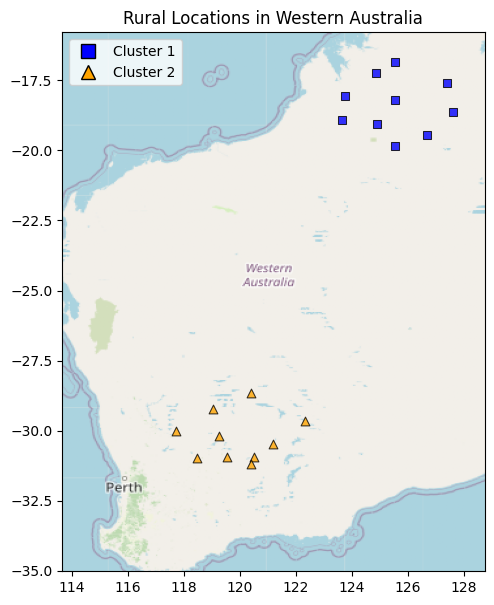

In [44]:
generate_fake_cluster_map(okay_cluster_df, cluster_fake_labels)

In [45]:
dunn(split_clusters(okay_cluster_df, cluster_fake_labels))

0.21551050236708186

#### Good Cluster

In [46]:
good_cluster = [{"Latitude": -18.19008, "Longitude": 125.54025, "Cluster_no": 0},
                {"Latitude": -17.17622, "Longitude": 125.55176, "Cluster_no": 0},
                {"Latitude": -18.80622, "Longitude": 125.51880, "Cluster_no": 0},
                {"Latitude": -17.57465, "Longitude": 124.95850, "Cluster_no": 0},
                {"Latitude": -17.79446, "Longitude": 126.72729, "Cluster_no": 0},
                {"Latitude": -18.56685, "Longitude": 126.79321, "Cluster_no": 0},
                {"Latitude": -18.36886, "Longitude": 124.79370, "Cluster_no": 0},
                {"Latitude": -18.37212, "Longitude": 126.19995, "Cluster_no": 0},
                {"Latitude": -17.66496, "Longitude": 126.01044, "Cluster_no": 0},
                {"Latitude": -18.17064, "Longitude": 126.74377, "Cluster_no": 0},
                {"Latitude": -30.19024, "Longitude": 119.26758, "Cluster_no": 1},
                {"Latitude": -29.39833, "Longitude": 119.22905, "Cluster_no": 1},
                {"Latitude": -30.64914, "Longitude": 119.20166, "Cluster_no": 1},
                {"Latitude": -30.09464, "Longitude": 120.08057, "Cluster_no": 1},
                {"Latitude": -29.67075, "Longitude": 118.77869, "Cluster_no": 1},
                {"Latitude": -29.61346, "Longitude": 120.00916, "Cluster_no": 1},
                {"Latitude": -30.31302, "Longitude": 118.50952, "Cluster_no": 1},
                {"Latitude": -30.37939, "Longitude": 119.95422, "Cluster_no": 1},
                {"Latitude": -30.66331, "Longitude": 120.20142, "Cluster_no": 1},
                {"Latitude": -29.81384, "Longitude": 119.69055, "Cluster_no": 1}]
good_cluster_df = pd.DataFrame(good_cluster)

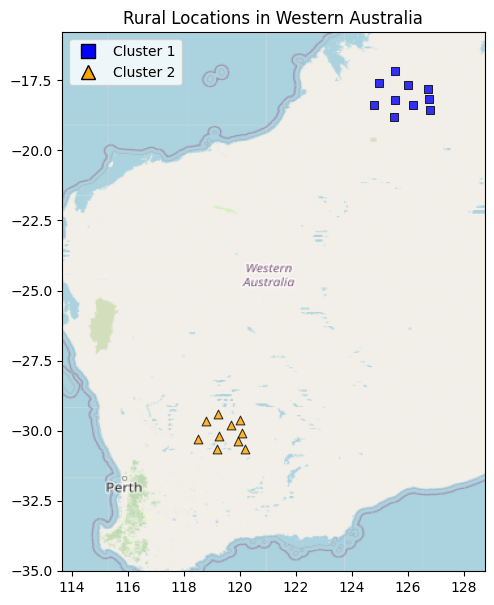

In [47]:
generate_fake_cluster_map(good_cluster_df, cluster_fake_labels)

In [48]:
dunn(split_clusters(good_cluster_df, cluster_fake_labels))

0.47942904700221944

#### Really Good Cluster

In [49]:
really_good_cluster = [{"Latitude": -18.19008, "Longitude": 125.54025, "Cluster_no": 0},
                {"Latitude": -18.07586, "Longitude": 125.56824, "Cluster_no": 0},
                {"Latitude": -18.09283, "Longitude": 125.49545, "Cluster_no": 0},
                {"Latitude": -18.14243, "Longitude": 125.43777, "Cluster_no": 0},
                {"Latitude": -18.19764, "Longitude": 125.45082, "Cluster_no": 0},
                {"Latitude": -18.23351, "Longitude": 125.49614, "Cluster_no": 0},
                {"Latitude": -18.23567, "Longitude": 125.62248, "Cluster_no": 0},
                {"Latitude": -18.22034, "Longitude": 125.62248, "Cluster_no": 0},
                {"Latitude": -18.15197, "Longitude": 125.61699, "Cluster_no": 0},
                {"Latitude": -18.09454, "Longitude": 125.57304, "Cluster_no": 0},
                {"Latitude": -30.19024, "Longitude": 119.26758, "Cluster_no": 1},
                {"Latitude": -30.30376, "Longitude": 119.27994, "Cluster_no": 1},
                {"Latitude": -30.39501, "Longitude": 119.28680, "Cluster_no": 1},
                {"Latitude": -30.29628, "Longitude": 119.11377, "Cluster_no": 1},
                {"Latitude": -30.28205, "Longitude": 119.45984, "Cluster_no": 1},
                {"Latitude": -30.39820, "Longitude": 119.50653, "Cluster_no": 1},
                {"Latitude": -30.15863, "Longitude": 119.08356, "Cluster_no": 1},
                {"Latitude": -30.12657, "Longitude": 119.39941, "Cluster_no": 1},
                {"Latitude": -30.41004, "Longitude": 119.12338, "Cluster_no": 1},
                {"Latitude": -30.34488, "Longitude": 119.41040, "Cluster_no": 1}]
really_good_cluster_df = pd.DataFrame(really_good_cluster)

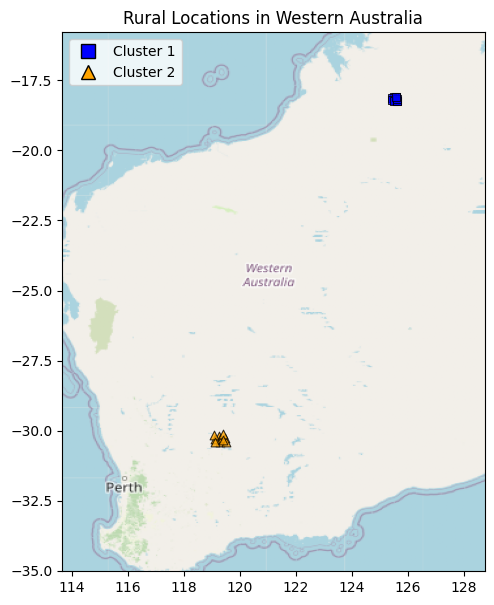

In [50]:
generate_fake_cluster_map(really_good_cluster_df, cluster_fake_labels)

In [51]:
dunn(split_clusters(really_good_cluster_df, cluster_fake_labels))

2.0571716143635057

###